# Pratiksha Raval 
## praval@scu.edu
## Project 2

## TMDB 5000 The Movie Dataset  

In [1]:
'''importing required modules'''
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import json
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
%matplotlib inline

In [2]:
'''importing both the datasets'''
movies = pd.read_csv('tmdb_5000_movies.csv')
mov = pd.read_csv('tmdb_5000_credits.csv')
meta_mov = pd.read_csv('movies_metadata.csv')

In [3]:
'''dataset 1: movies'''
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
'''dataset 2: mov'''
mov.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
'''dataset 3: meta'''
meta_mov.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


# Cleaning the datasets

In [6]:
'''for movies dataset'''  
# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)

'''for mov dataset'''    
# changing the cast column from json to string
mov['cast']=mov['cast'].apply(json.loads)
for index,i in zip(mov.index,mov['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
mov['crew']=mov['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
mov['crew']=mov['crew'].apply(director)
mov.rename(columns={'crew':'director'},inplace=True)

In [7]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [8]:
mov.head()

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


# Merging two datasets 

Using .merge to combine two datasets into 'movie' and selecting relevant columns to work with

In [9]:
movie = movies.merge(mov, left_on='id', right_on='movie_id', how='left')# merging the two csv files
movie = movie[['id','original_title','genres','cast','vote_average','director','keywords', 'release_date']]
movie.head()

,id,original_title,genres,cast,vote_average,director,keywords,release_date
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...",2009-12-10
1,285,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...",2007-05-19
2,206647,Spectre,"['Action', 'Adventure', 'Crime']","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...",2015-10-26
3,49026,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...",2012-07-16
4,49529,John Carter,"['Action', 'Adventure', 'Science Fiction']","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...",2012-03-07


</br>

# Interesting Fact #1: Number of films per year

In [10]:
'''The title_year variable indicates when films were released'''
movie['title_year'] = pd.to_datetime(movies['release_date']).apply(lambda x: x.year)

Grouping the films by decades in order to have a global look at the way films are distributed according to this variable

In [11]:
movie['decade'] = movie['title_year'].apply(lambda x:((x-1900)//10)*10)

# function that extract statistical parameters from a grouby objet:
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}

test = movie['title_year'].groupby(movie['decade']).apply(get_stats).unstack()

In [12]:
'''to have a look at the decade column'''
movie

,id,original_title,genres,cast,vote_average,director,keywords,release_date,title_year,decade
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...",2009-12-10,2009.0,100.0
1,285,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...",2007-05-19,2007.0,100.0
2,206647,Spectre,"['Action', 'Adventure', 'Crime']","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...",2015-10-26,2015.0,110.0
3,49026,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...",2012-07-16,2012.0,110.0
4,49529,John Carter,"['Action', 'Adventure', 'Science Fiction']","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...",2012-03-07,2012.0,110.0
...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"['Action', 'Crime', 'Thriller']","['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",6.6,Robert Rodriguez,"['united states–mexico barrier', 'legs', 'arms...",1992-09-04,1992.0,90.0
4799,72766,Newlyweds,"['Comedy', 'Romance']","['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",5.9,Edward Burns,[],2011-12-26,2011.0,110.0
4800,231617,"Signed, Sealed, Delivered","['Comedy', 'Drama', 'Romance', 'TV Movie']","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...",7.0,Scott Smith,"['date', 'love at first sight', 'narration', '...",2013-10-13,2013.0,110.0
4801,126186,Shanghai Calling,[],"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...",5.7,Daniel Hsia,[],2012-05-03,2012.0,110.0


Representing the results in a pie chart

Text(0.5, 1.0, '% of films per decade')

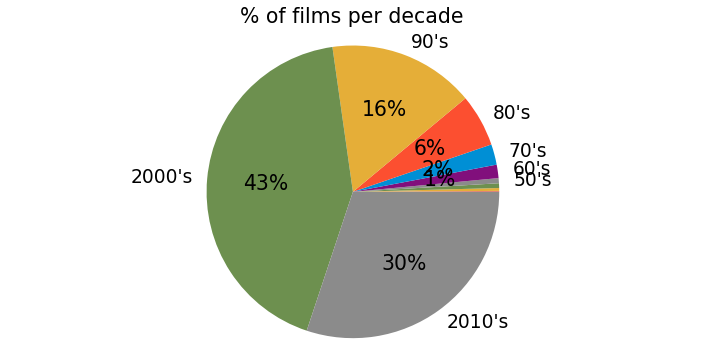

In [13]:
sns.set_context("poster", font_scale=0.85)

def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine

f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
ax.pie(sizes, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '')
ax.axis('equal')
ax.set_title('% of films per decade')

</br>

# Interesting Fact #2: The actors and directors with the highest movies

Working with cast column

In [14]:
movie['cast']=movie['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movie['cast']=movie['cast'].str.split(',')
movie.head(3)

,id,original_title,genres,cast,vote_average,director,keywords,release_date,title_year,decade
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...",2009-12-10,2009.0,100.0
1,285,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...",2007-05-19,2007.0,100.0
2,206647,Spectre,"['Action', 'Adventure', 'Crime']","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...",2015-10-26,2015.0,110.0


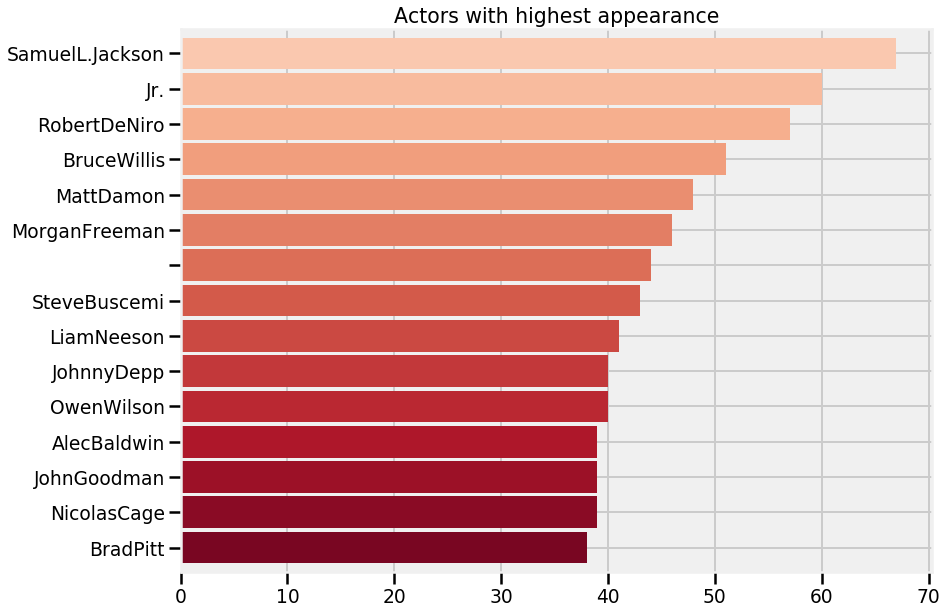

In [15]:
plt.subplots(figsize=(12,10))

list1 = []
for i in movie['cast']:
    list1.extend(i)
max_mov_by = pd.Series(list1).value_counts()[:15].sort_values(ascending=True)\
            .plot.barh(width=0.9,color=sns.color_palette('RdBu',40))

plt.title('Actors with highest appearance')
plt.show()

Samuel Jackson aka Nick Fury from avengers has appeared in maximum movies.

## The director with the highest movies

working with director column

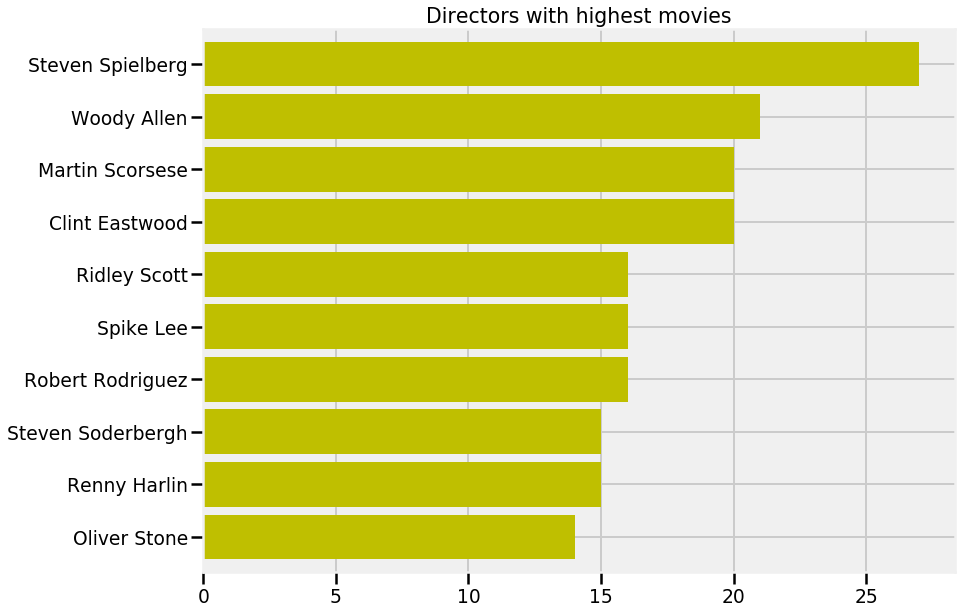

In [16]:
plt.subplots(figsize=(12,10))

max_mov = movie['director'].value_counts()[:10].sort_values(ascending=True)\
                .plot.barh(width=0.85, color='y')

plt.title('Directors with highest movies')
plt.show()

# Finding 3: Using DecisionTree Regression model 

In [17]:
movie.drop(labels = ['genres','cast','keywords', 'release_date'], axis = 1, inplace = True)
movie

,id,original_title,vote_average,director,title_year,decade
0,19995,Avatar,7.2,James Cameron,2009.0,100.0
1,285,Pirates of the Caribbean: At World's End,6.9,Gore Verbinski,2007.0,100.0
2,206647,Spectre,6.3,Sam Mendes,2015.0,110.0
3,49026,The Dark Knight Rises,7.6,Christopher Nolan,2012.0,110.0
4,49529,John Carter,6.1,Andrew Stanton,2012.0,110.0
...,...,...,...,...,...,...
4798,9367,El Mariachi,6.6,Robert Rodriguez,1992.0,90.0
4799,72766,Newlyweds,5.9,Edward Burns,2011.0,110.0
4800,231617,"Signed, Sealed, Delivered",7.0,Scott Smith,2013.0,110.0
4801,126186,Shanghai Calling,5.7,Daniel Hsia,2012.0,110.0


In [18]:
'''create dummies to prepare data'''
movie = pd.get_dummies(movie)
movie.head()

,id,vote_average,title_year,decade,original_title_#Horror,original_title_$upercapitalist,original_title_(500) Days of Summer,original_title_...E tu vivrai nel terrore! L'aldilà,original_title_10 Cloverfield Lane,original_title_10 Days in a Madhouse,...,director_Zackary Adler,director_Zak Penn,director_Zal Batmanglij,director_Zhang Yimou,director_Zoran Lisinac,director_Àlex Pastor,director_Álex de la Iglesia,director_Émile Gaudreault,director_Éric Tessier,director_Étienne Faure
0,19995,7.2,2009.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,285,6.9,2007.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,6.3,2015.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,7.6,2012.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49529,6.1,2012.0,110.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
'''Getting non-object elements'''
X_data=movie.dtypes[movie.dtypes!='object'].index
X_train=movie[X_data]
X_train.head()[:2]

,id,vote_average,title_year,decade,original_title_#Horror,original_title_$upercapitalist,original_title_(500) Days of Summer,original_title_...E tu vivrai nel terrore! L'aldilà,original_title_10 Cloverfield Lane,original_title_10 Days in a Madhouse,...,director_Zackary Adler,director_Zak Penn,director_Zal Batmanglij,director_Zhang Yimou,director_Zoran Lisinac,director_Àlex Pastor,director_Álex de la Iglesia,director_Émile Gaudreault,director_Éric Tessier,director_Étienne Faure
0,19995,7.2,2009.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,285,6.9,2007.0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train.describe()

,id,vote_average,title_year,decade,original_title_#Horror,original_title_$upercapitalist,original_title_(500) Days of Summer,original_title_...E tu vivrai nel terrore! L'aldilà,original_title_10 Cloverfield Lane,original_title_10 Days in a Madhouse,...,director_Zackary Adler,director_Zak Penn,director_Zal Batmanglij,director_Zhang Yimou,director_Zoran Lisinac,director_Àlex Pastor,director_Álex de la Iglesia,director_Émile Gaudreault,director_Éric Tessier,director_Étienne Faure
count,4803.000000,4803.000000,4802.000000,4802.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,57165.484281,6.092172,2002.468763,98.063307,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208,...,0.000208,0.000208,0.000416,0.001249,0.000208,0.000208,0.000208,0.000208,0.000208,0.000208
std,88694.614033,1.194612,12.414354,12.843804,0.014429,0.014429,0.014429,0.014429,0.014429,0.014429,...,0.014429,0.014429,0.020404,0.035326,0.014429,0.014429,0.014429,0.014429,0.014429,0.014429
min,5.000000,0.000000,1916.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9014.500000,5.600000,1999.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14629.000000,6.200000,2005.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58610.500000,6.800000,2011.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,459488.000000,10.000000,2017.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
'''Finding all the columns with NULL values'''

np.sum(X_train.isnull())

id                             0
vote_average                   0
title_year                     1
decade                         1
original_title_#Horror         0
                              ..
director_Àlex Pastor           0
director_Álex de la Iglesia    0
director_Émile Gaudreault      0
director_Éric Tessier          0
director_Étienne Faure         0
Length: 7154, dtype: int64

In [22]:
# Filling all Null values
X_train=X_train.fillna(0)
columns=X_train.columns.tolist()
y=X_train['vote_average']
X_train.drop(['vote_average'],axis=1,inplace=True)
X_train.head()[:2]

,id,title_year,decade,original_title_#Horror,original_title_$upercapitalist,original_title_(500) Days of Summer,original_title_...E tu vivrai nel terrore! L'aldilà,original_title_10 Cloverfield Lane,original_title_10 Days in a Madhouse,original_title_10 Things I Hate About You,...,director_Zackary Adler,director_Zak Penn,director_Zal Batmanglij,director_Zhang Yimou,director_Zoran Lisinac,director_Àlex Pastor,director_Álex de la Iglesia,director_Émile Gaudreault,director_Éric Tessier,director_Étienne Faure
0,19995,2009.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,285,2007.0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

In [24]:
'''splitting the data into test and train models'''
train_test_split(X_Train, y, test_size = 0.3, random_state=0)

[array([[11565.,  2006.,   100., ...,     0.,     0.,     0.],
        [12634.,  2004.,   100., ...,     0.,     0.,     0.],
        [61891.,  2011.,   110., ...,     0.,     0.,     0.],
        ...,
        [76640.,  2013.,   110., ...,     0.,     0.,     0.],
        [  115.,  1998.,    90., ...,     0.,     0.,     0.],
        [ 9816.,  2001.,   100., ...,     0.,     0.,     0.]]),
 array([[2.81780e+04, 2.00900e+03, 1.00000e+02, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [9.27700e+03, 1.97300e+03, 7.00000e+01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [2.28326e+05, 2.01400e+03, 1.10000e+02, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        ...,
        [6.30200e+04, 1.99500e+03, 9.00000e+01, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.44000e+03, 2.00600e+03, 1.00000e+02, ..., 0.00000e+00,
         0.00000e+00, 0.00000e+00],
        [1.77080e+04, 2.00100e+03, 1.00000e+02, ..., 0.00000e+00,
         0.00000e+

In [25]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)

In [26]:
'''defining and building a decision tree'''
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

Text(0.5, 1.0, 'Residual plot in Decision Tree')

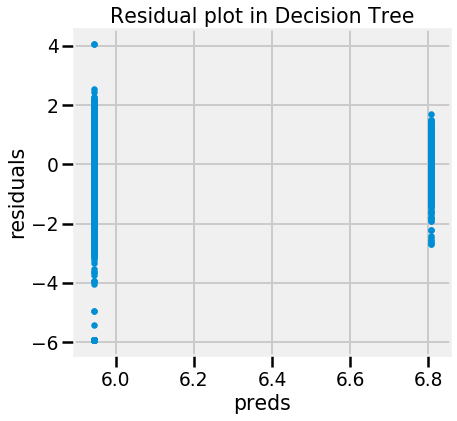

In [27]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")